# Machine learning (Binary Classification) by python 

In [586]:
import numpy as np       
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
'''This three packages are the basic package for data science in python'''

'This three packages are the basic package for data science in python'

In [587]:
'''Load some sklearn models'''
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
'''------------------------------------------'''
from sklearn.metrics import confusion_matrix,recall_score,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_predict,KFold, cross_val_score,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
import itertools

from sklearn.datasets import load_breast_cancer

SEED = 233

In [588]:
All_data, All_Y = load_breast_cancer(return_X_y=True,as_frame =True)
All_Y = pd.DataFrame(All_Y)
print('All feature size is:',All_data.shape,'Target size is:',All_Y.shape)

All feature size is: (569, 30) Target size is: (569, 1)


In [589]:
X_Train, X_Test, y_Train, y_Test = train_test_split(All_data, All_Y, test_size=0.2, random_state=SEED)
print('Training samples size:',X_Train.shape,y_Train.shape)
print('Test samples size    :',X_Test.shape,y_Test.shape)

Training samples size: (455, 30) (455, 1)
Test samples size    : (114, 30) (114, 1)


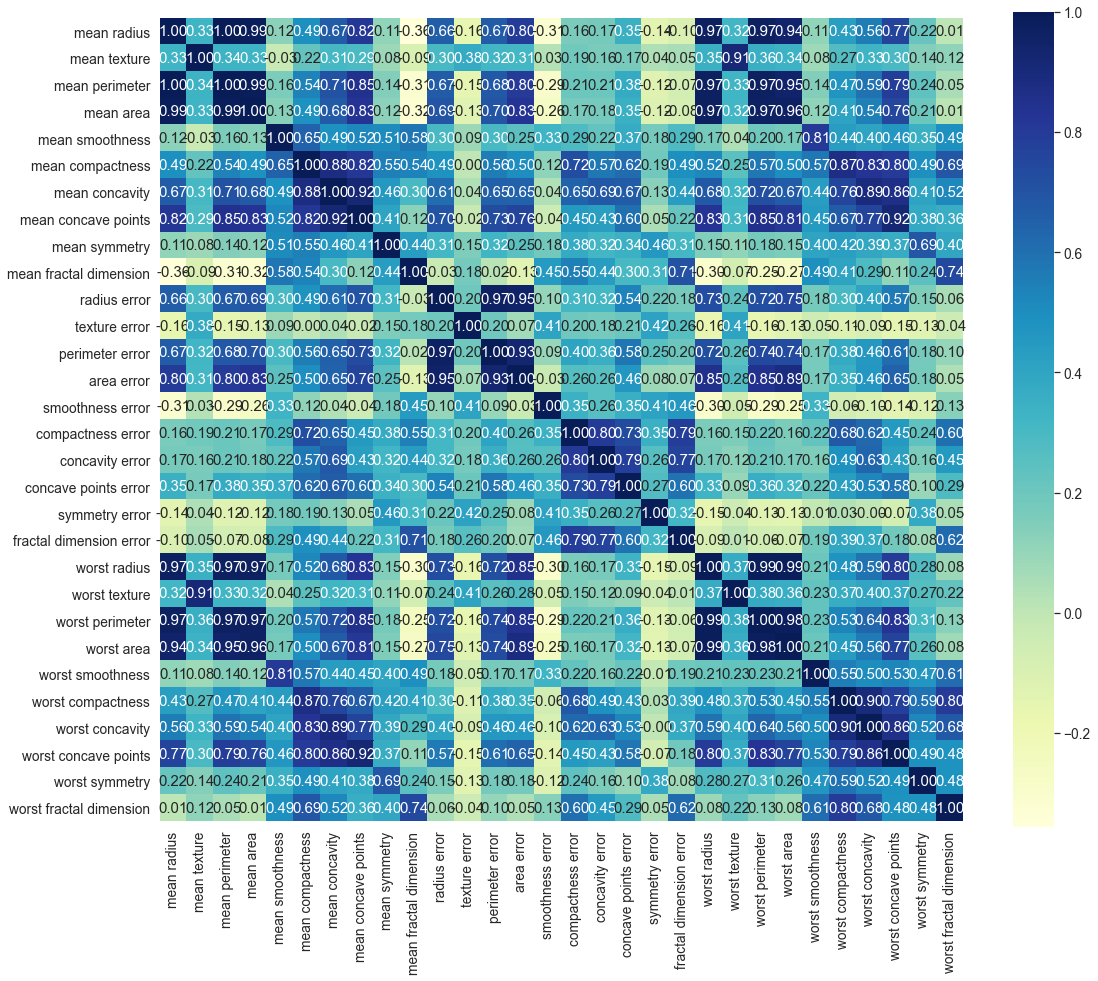

In [590]:
corrmat= X_Train.corr()
f,ax=plt.subplots(figsize=(18,15))
hm = sns.heatmap(corrmat,square=True,annot=True,fmt=".2f",cmap='YlGnBu');
hm.set_ylim([X_Train.shape[1], 0]);
#linear relationship

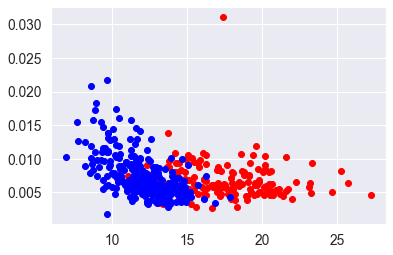

In [591]:
var1 = 'mean radius'
var2 = 'smoothness error'

plt.scatter(X_Train[y_Train['target']==0][var1], X_Train[y_Train['target']==0][var2], color="red")
plt.scatter(X_Train[y_Train['target']==1][var1], X_Train[y_Train['target']==1][var2], color="blue")

plt.show()

In [592]:
X_Train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

## Machine learning model
### 1. Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [593]:
LR =  LogisticRegression(random_state = SEED)
LR.fit(X_Train,y_Train)
print("Model AUC Train score: %.4f  " % roc_auc_score(y_Train,LR.predict_proba(X_Train)[:,1]),end='')
print("Model AUC Test score: %.4f" % roc_auc_score(y_Test,LR.predict_proba(X_Test)[:,1]))

Model AUC Train score: 0.9933  Model AUC Test score: 0.9730


### 2. Decsion Tree and SVM MLP KNN RF

In [594]:
Mo =  DecisionTreeClassifier(random_state = SEED)
Mo.fit(X_Train,y_Train)
print("Model AUC Train score: %.4f  " % roc_auc_score(y_Train,Mo.predict_proba(X_Train)[:,1]),end='')
print("Model AUC Test score: %.4f" % roc_auc_score(y_Test,Mo.predict_proba(X_Test)[:,1]))

Model AUC Train score: 1.0000  Model AUC Test score: 0.9170


In [595]:
Mo = SVC(probability=True,random_state = SEED)
Mo.fit(X_Train,y_Train)
print("Model AUC Train score: %.4f  " % roc_auc_score(y_Train,Mo.predict_proba(X_Train)[:,1]),end='')
print("Model AUC Test score: %.4f" % roc_auc_score(y_Test,Mo.predict_proba(X_Test)[:,1]))

Model AUC Train score: 0.9789  Model AUC Test score: 0.9403


In [596]:
Mo = KNeighborsClassifier()
Mo.fit(X_Train,y_Train)
print("Model AUC Train score: %.4f  " % roc_auc_score(y_Train,Mo.predict_proba(X_Train)[:,1]),end='')
print("Model AUC Test score: %.4f" % roc_auc_score(y_Test,Mo.predict_proba(X_Test)[:,1]))

Model AUC Train score: 0.9939  Model AUC Test score: 0.9071


In [597]:
Mo = MLPClassifier(random_state = SEED)
Mo.fit(X_Train,y_Train)
print("Model AUC Train score: %.4f  " % roc_auc_score(y_Train,Mo.predict_proba(X_Train)[:,1]),end='')
print("Model AUC Test score: %.4f" % roc_auc_score(y_Test,Mo.predict_proba(X_Test)[:,1]))

Model AUC Train score: 0.9878  Model AUC Test score: 0.9701


In [598]:
Mo = RandomForestClassifier(random_state = SEED)
Mo.fit(X_Train,y_Train)
print("Model AUC Train score: %.4f  " % roc_auc_score(y_Train,Mo.predict_proba(X_Train)[:,1]),end='')
print("Model AUC Test score: %.4f" % roc_auc_score(y_Test,Mo.predict_proba(X_Test)[:,1]))

Model AUC Train score: 1.0000  Model AUC Test score: 0.9925


### 3. Bagging Model

In [599]:
def get_models():
    M1 = LogisticRegression(random_state = SEED)
    M2 =DecisionTreeClassifier(random_state = SEED)
    M3 = SVC(probability=True,random_state = SEED)
    M4 = KNeighborsClassifier()
    M5 = MLPClassifier(random_state = SEED)
    M6 = RandomForestClassifier(random_state = SEED)
    
    models ={'LR': M1,
             'DT': M2,
             'SVM':M3,
             'KNN':M4,
             'MLP':M5,
             'RF':M6,
            }   
    return models

In [600]:
def train_predict(model_list,X_Train,y_Train,X_Test):
    P = np.zeros((X_Test.shape[0],len(model_list)))
    P = pd.DataFrame(P,index = X_Test.index)
    print("Fitting models.")
    
    cols = list()
    
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_Train, y_Train)
        P.iloc[:, i] = m.predict_proba(X_Test)[:, 1]
        cols.append(name)
        print("done")
        
    P.columns = cols
    print("Done.\n")
    return P

In [601]:
def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    aucscores = []
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.4f" % (m, score))
        aucscores.append(score)
    print("Done.\n")
    return aucscores

In [602]:
def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(ytest, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(ytest, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()

In [603]:
models = get_models()
P = train_predict(models,X_Train,y_Train,X_Test)
aucresult1 = score_models(P, y_Test['target'])

aucresult = pd.DataFrame(aucresult1,index=models)
aucresult = aucresult.rename(columns={0:'NormalTest'})

Fitting models.
LR... done
DT... done
SVM... done
KNN... done
MLP... done
RF... done
Done.

Scoring models.
LR                        : 0.9730
DT                        : 0.9170
SVM                       : 0.9403
KNN                       : 0.9071
MLP                       : 0.9701
RF                        : 0.9925
Done.



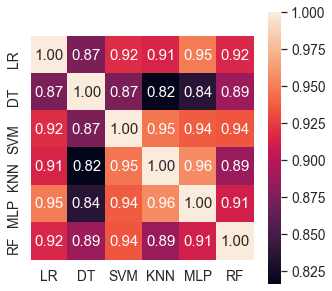

In [604]:
corrmat= P.corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(5,5))
hm = sns.heatmap(corrmat,cbar=True,square=True,annot=True,fmt=".2f");
hm.set_ylim([P.shape[1], 0]);
plt.show()

Ensemble bagging ROC-AUC score: 0.978


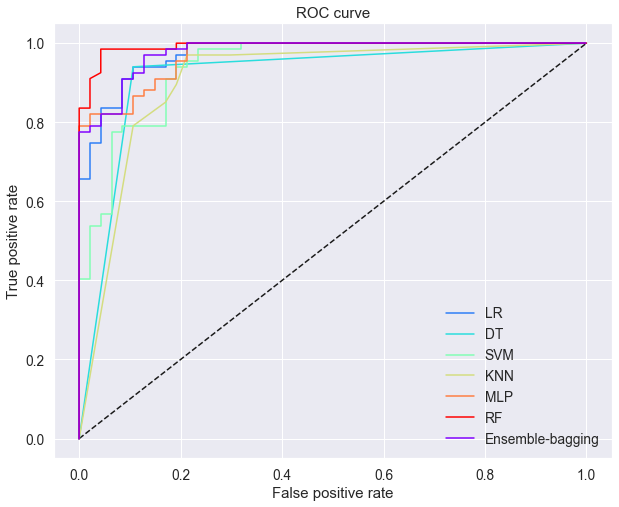

In [605]:
print("Ensemble bagging ROC-AUC score: %.3f" % roc_auc_score(y_Test['target'], P.mean(axis=1)))
plot_roc_curve(y_Test['target'], P.values, P.mean(axis=1), list(P.columns), "Ensemble-bagging")

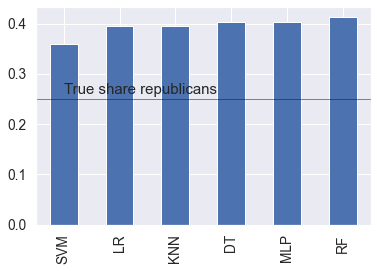

In [606]:
p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
p.index = ["DEM", "REP"]
p.loc["REP", :].sort_values().plot(kind="bar")
plt.axhline(0.25, color="k", linewidth=0.5)
plt.text(0., 0.26, "True share republicans")
plt.show()

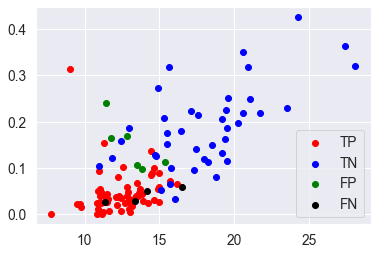

In [607]:
var1 = 'mean radius'
var2 = 'mean concavity'
Modelcolumn = 'LR'  
Threshold = 0.5    # 0-1 var


TPjudge = (y_Test['target']==1)&(P[Modelcolumn]>Threshold)
TNjudge = (y_Test['target']==0)&(P[Modelcolumn]<Threshold)
FPjudge = (y_Test['target']==0)&(P[Modelcolumn]>Threshold)
FNjudge = (y_Test['target']==1)&(P[Modelcolumn]<Threshold)


plt.scatter(X_Test[TPjudge][var1], X_Test[TPjudge][var2], color="red",label='TP')
plt.scatter(X_Test[TNjudge][var1], X_Test[TNjudge][var2], color="blue",label='TN')
plt.scatter(X_Test[FPjudge][var1], X_Test[FPjudge][var2], color="green",label='FP')
plt.scatter(X_Test[FNjudge][var1], X_Test[FNjudge][var2], color="black",label='FN')

plt.legend(loc = 'lower right');

plt.show()

In [608]:
X_Test.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

### 4. K-fold Training

In [609]:
def get_oof(clf, X_Train, y_Train, X_Test):
    oof_train = np.zeros((n_train,))
    oof_test = np.zeros((n_test,))
    oof_test_skf = np.empty((NFOLDS, n_test))
    X_Train.index = range(len(X_Train))
    y_Train.index = range(len(y_Train))
    for i, (train_index, test_index) in enumerate(kf.split(X_Train)):
        X_tr = X_Train.loc[train_index]
        y_tr = y_Train.loc[train_index]
        X_te = X_Train.loc[test_index]

        clf.fit(X_tr, y_tr)

        oof_train[test_index] = clf.predict_proba(X_te)[:,1]
        oof_test_skf[i, :] = clf.predict_proba(X_Test)[:,1]

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [610]:
n_train = X_Train.shape[0]
n_test = X_Test.shape[0]
NFOLDS = 3
kf = KFold(n_splits= NFOLDS,random_state=SEED)

In [611]:
aucresult1 = []

Stacking_Train = pd.DataFrame(columns = models,index =X_Train.index)
Stacking_Test = pd.DataFrame(columns = models,index =X_Test.index)


for m in models:
    M1_oof_train, M1_oof_test = get_oof(models[m], X_Train, y_Train, X_Test)
    print(m,"Model K-Fold AUC Train score: %.4f  " % roc_auc_score(y_Train,pd.DataFrame(M1_oof_train,index=y_Train.index)),end='')
    print(m,"Model K-Fold AUC Test score: %.4f" % roc_auc_score(y_Test['target'],pd.DataFrame(M1_oof_test,index=y_Test.index)))
    aucresult1.append(roc_auc_score(y_Test['target'],pd.DataFrame(M1_oof_test,index=y_Test.index)))
    Stacking_Train[m] =  M1_oof_train.ravel()
    Stacking_Test[m] = M1_oof_test.ravel()

LR Model K-Fold AUC Train score: 0.9862  LR Model K-Fold AUC Test score: 0.9765
DT Model K-Fold AUC Train score: 0.9481  DT Model K-Fold AUC Test score: 0.9895
SVM Model K-Fold AUC Train score: 0.9769  SVM Model K-Fold AUC Test score: 0.9371
KNN Model K-Fold AUC Train score: 0.9582  KNN Model K-Fold AUC Test score: 0.9165
MLP Model K-Fold AUC Train score: 0.9770  MLP Model K-Fold AUC Test score: 0.9670
RF Model K-Fold AUC Train score: 0.9875  RF Model K-Fold AUC Test score: 0.9927


In [612]:
aucresult['K_fold3']=aucresult1
aucresult

,NormalTest,K_fold3
LR,0.973007,0.976500
DT,0.916958,0.989520
SVM,0.940299,0.937123
KNN,0.907113,0.916481
MLP,0.970149,0.966974
RF,0.992537,0.992696


### 5 Stacking Model

In [613]:
print('The shape of stacking train and test dataset',Stacking_Train.shape,Stacking_Test.shape)
Stacking_Train.head()

The shape of stacking train and test dataset (455, 6) (114, 6)


,LR,DT,SVM,KNN,MLP,RF
372,5.649580e-03,0.0,0.003245,0.0,4.961429e-02,0.09
97,9.939857e-01,1.0,0.990399,1.0,9.840678e-01,0.99
124,9.954075e-01,1.0,0.938412,1.0,9.924285e-01,0.98
51,9.960370e-01,1.0,0.920768,1.0,9.939389e-01,1.00
433,2.292123e-08,0.0,0.001198,0.0,5.462228e-08,0.00


In [614]:
Stacking = LogisticRegression().fit(Stacking_Train,y_Train)
print("LR stacking training AUC score: %.4f" % roc_auc_score(y_Train,Stacking.predict_proba(Stacking_Train)[:,1]),end='')
print("  test AUC score: %.4f" % roc_auc_score(y_Test['target'],Stacking.predict_proba(Stacking_Test)[:,1]))

LR stacking training AUC score: 0.9917  test AUC score: 0.9857
